In [1]:
#importing library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows' ,None)
import plotly.express as px
import folium
from folium.plugins import MarkerCluster

In [2]:
#loading data into dataframe and assigning column name

pub = pd.read_csv('open_pubs.csv', names = ['ID','Name','Address','Postcode','Easting','Northing','Latitude','Longitude','Loc_athurity'])

pub.head()

,ID,Name,Address,Postcode,Easting,Northing,Latitude,Longitude,Loc_athurity
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh


In [4]:
#shape of the data

print('Total rows and columns  :', pub.shape)
print('No of duplicated rows : ',pub.duplicated().sum())

Total rows and columns  : (51331, 9)
No of duplicated rows :  0


In [11]:
#data overview
pub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51331 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            51331 non-null  int64 
 1   Name          51331 non-null  object
 2   Address       51331 non-null  object
 3   Postcode      51331 non-null  object
 4   Rasting       51331 non-null  int64 
 5   Northing      51331 non-null  int64 
 6   Latitude      51331 non-null  object
 7   Longitude     51331 non-null  object
 8   Loc_athurity  51331 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB


In [13]:
#Total unique value in each column

pub.nunique()

ID              51331
Name            36335
Address         50013
Postcode        45886
Easting         43229
Northing        43896
Latitude        46810
Longitude       46807
Loc_athurity      360
dtype: int64

In [3]:
#Droping ID column from dataframe because it's unique value for each row

pub.drop(['ID'], axis =1 , inplace = True)
pub.columns

Index(['Name', 'Address', 'Postcode', 'Easting', 'Northing', 'Latitude',
       'Longitude', 'Loc_athurity'],
      dtype='object')

In [18]:
pub.tail()

,Name,Address,Postcode,Easting,Northing,Latitude,Longitude,Loc_athurity
51326,Wrexham & District War Memorial Club Ltd,"Wrexham War Memorial Club Farndon Street, Wrex...",LL13 8DE,333909,350438,53.047100,-2.987319,Wrexham
51327,Wrexham Lager Social Club,"1 - 3 Union Road, Wrexham, Wrexham",LL13 7SR,333028,350563,53.048123,-3.000485,Wrexham
51328,Wrexham Rail Sports & Social Club,"Sports And Social Club, 44 Brook Street, Wrexh...",LL13 7LU,333259,350213,53.044998,-2.996966,Wrexham
51329,Wrexham Rugby Club,"Wrexham Rugby Club Bryn Estyn Road, Wrexham, W...",LL13 9TY,335808,351078,53.053094,-2.959124,Wrexham
51330,Y Tai,"Y Tai Railway Road, Brymbo, Wrexham, Wrexham",LL11 5EA,329721,353785,53.076638,-3.050512,Wrexham


In [4]:
#univerate veriate analysis

pub.Loc_athurity.value_counts()

County Durham                          686
Leeds                                  611
Cornwall                               564
Wiltshire                              549
Kirklees                               525
City of Edinburgh                      511
Birmingham                             499
Buckinghamshire                        487
Bradford                               478
Northumberland                         446
East Riding of Yorkshire               432
Shropshire                             416
Bristol, City of                       409
Dorset                                 409
Fife                                   404
Liverpool                              370
Manchester                             366
Glasgow City                           357
Westminster                            354
Sheffield                              349
Brighton and Hove                      348
Calderdale                             340
Wakefield                              327
West Northa

<Axes: >

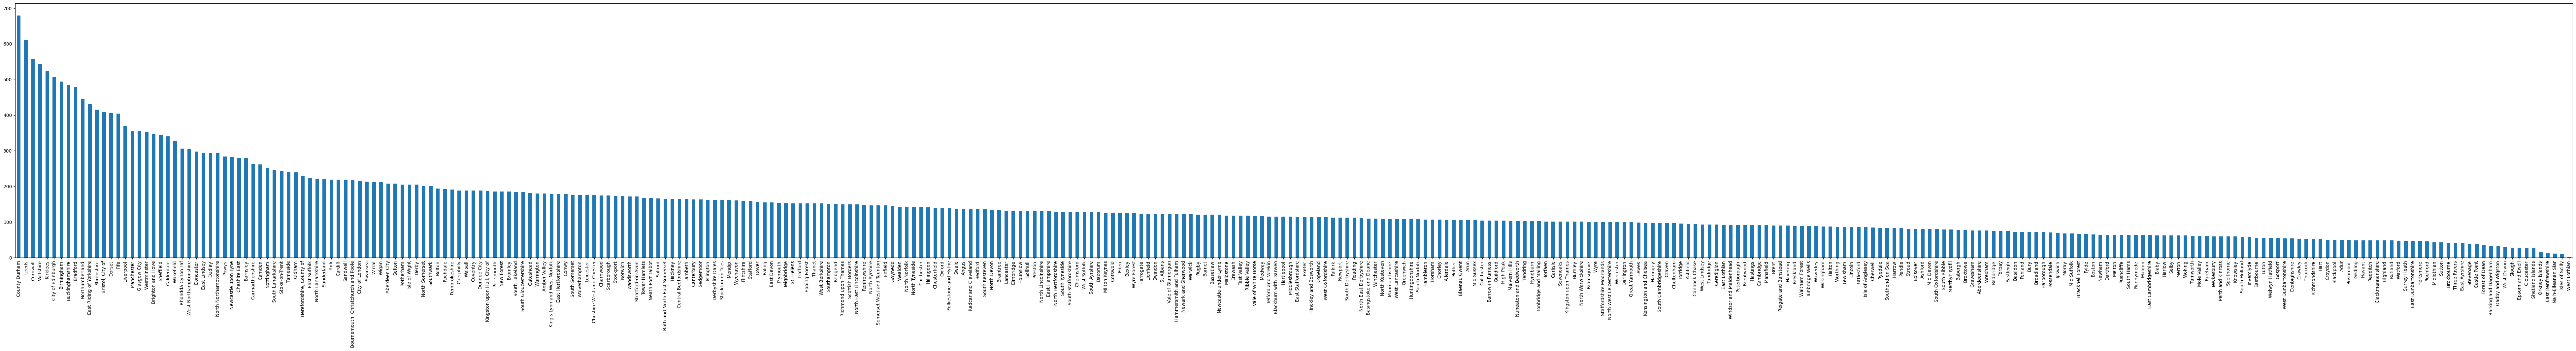

In [50]:
pub.Loc_athurity.value_counts().plot(kind = 'bar', figsize = (100,10))

In [5]:
pub[['Latitude','Longitude']][0:30]


,Latitude,Longitude
0,51.970379,0.979340
1,51.958698,1.057832
2,52.038595,0.729915
3,\N,\N
4,\N,\N
5,52.028694,0.895650
6,51.955042,1.267642
7,52.037903,0.732687
8,\N,\N
9,52.043494,1.102543


In [35]:
pub['Latitude'][3]

'\\N'

In [37]:
pub[pub['Latitude'] == '\\N'].shape

# In Latitude and longtitude column containing \\N for 767 times

(767, 8)

In [4]:
# Removing '\\N' word from Latitude and longtitude column and changing data type to float

pub = pub[~ (pub['Latitude'] == '\\N')]

pub['Latitude'] = pub['Latitude'].astype('float')
pub['Longitude'] = pub['Longitude'].astype('float')

print('Data type of Latitude column : ',pub['Latitude'].dtype)
print('Data type of Latitude column : ',pub['Longitude'].dtype)

print('Count of \\N word : ',pub[pub['Latitude'] == '\\N'].shape)

Data type of Latitude column :  float64
Data type of Latitude column :  float64
Count of \N word :  (0, 8)


In [7]:
pub.head(10)

,Name,Address,Postcode,Easting,Northing,Latitude,Longitude,Loc_athurity
0,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
5,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh
6,Bristol Arms,"Bristol Hill, Shotley, IPSWICH",IP9 1PU,624624,233550,51.955042,1.267642,Babergh
7,Caffeine Lounge,"14 Borehamgate Shopping Precinct, King Street,...",CO10 2ED,587527,241247,52.037903,0.732687,Babergh
9,Chestnut Tree Farm,"3 Donald Mackintosh Way, Pinewood, IPSWICH",IP8 3LQ,612862,242887,52.043494,1.102543,Babergh
10,Cock & Bell,"Cock And Bell, Hall Street, Long Melford, SUDBURY",CO10 9JR,586264,245558,52.077053,0.716643,Babergh
11,Eight Bells Inn,"Eight Bells Public House, 90-92 Angel Street, ...",IP7 5DD,602934,242836,52.046763,0.957949,Babergh
12,Finezza pizza,"Eight Bells Public House, 90-92 Angel Street, ...",IP7 5DD,602934,242836,52.046763,0.957949,Babergh


In [15]:
pub.nunique()

Name            35809
Address         49291
Postcode        45231
Easting         43228
Northing        43895
Latitude        46809
Longitude       46806
Loc_athurity      360
dtype: int64

In [5]:
# Initilizing all unique athority value 

loc_athority = pub['Loc_athurity'].unique()

In [10]:
# Creating a map with all pub

all_pub = folium.Map(location = [51.955042, 1.267642] , zoom_start = 15 , tiles='openstreetmap')



for i in range(100):
    folium.Marker([pub['Latitude'].iloc[i] , pub['Longitude'].iloc[i]] ,popup=pub['Name'].iloc[i], 
    tooltip=f'{i} Pub!',  icon=folium.Icon(color="green", icon="info-sign")).add_to(all_pub)
all_pub    

In [11]:
# Function for searchiing pubs by Local athority

def all_pub_by_Loc_athurity():
    
    Loc_Area = input("Enter the name of Loc Athurity : ")
    if Loc_Area in loc_athority:    
        data_by_athurity = pub[pub['Loc_athurity'] == Loc_Area]
        total_pub = len(data_by_athurity)
        print(f'In this Area {total_pub} pubs exist')
        print(data_by_athurity[['Name','Address','Postcode']])
    else:
        print('Encorrect Local athority name')
     

In [12]:
# Calling to all_pub_by_Loc_athurity

all_pub_by_Loc_athurity()

Enter the name of Loc Athurity : Babergh
In this Area 77 pubs exist
                                   Name  \
0                            Anchor Inn   
1                    Ark Bar Restaurant   
2                             Black Boy   
5                          Brewers Arms   
6                          Bristol Arms   
7                       Caffeine Lounge   
9                    Chestnut Tree Farm   
10                          Cock & Bell   
11                      Eight Bells Inn   
12                        Finezza pizza   
13                       Fox and Hounds   
14                Glemsford Social Club   
15   Grover and Allen - J D Wetherspoon   
16                      Hare And Hounds   
17                      Hare and Hounds   
18  Hintlesham & Chattisham Social Club   
19                           Kings Head   
20                        Kins Head Inn   
21                     Long Melford Inn   
22                          Maldon Grey   
24                  North Str

In [14]:
# Creating map with Loc Athority

loc_athority = pub['Loc_athurity'].unique()

Loc_Area = input("Enter the name of Loc Athurity : ")
if Loc_Area in loc_athority:    
    data_by_athurity = pub[pub['Loc_athurity'] == Loc_Area]
    
    loc_map = folium.Map(location = [data_by_athurity['Latitude'].iloc[1] , data_by_athurity['Longitude'].iloc[1]] ,
                         zoom_start = 15 , tiles='openstreetmap')
    
    for i in range(len(data_by_athurity)):
        folium.Marker([data_by_athurity['Latitude'].iloc[i] , data_by_athurity['Longitude'].iloc[i]] ,popup=data_by_athurity['Name'].iloc[i], 
        tooltip=f'{i} Pub!',  icon=folium.Icon(color="black", icon="info-sign")).add_to(loc_map)
        
else:
    print('Encorrect Local athority name')
     
loc_map        

Enter the name of Loc Athurity : Babergh


In [15]:
# Initilizing all unique athority value 

uk_postal_code = pub['Postcode'].unique()

In [16]:
# Function for searchiing pubs by Postal code

def all_pub_by_postal_code():
    
    postal_code = input("Enter the postal code of UK : ")
    if postal_code in uk_postal_code:    
        data_by_postal = pub[pub['Postcode'] == postal_code]
        total_pub = len(data_by_postal)
        print(f'In this Area {total_pub} pubs exist')
        print(data_by_postal[['Name','Address','Loc_athurity']])
    else:
        print('No such Postal codein UK')
     

In [17]:
pd.set_option('display.max_columns' ,None)


In [18]:
pd.set_option('display.max_colwidth' ,None)

In [19]:
# Calling to all_pub_by_postal_code function

all_pub_by_postal_code()

Enter the postal code of UK : IP7 5DD
In this Area 2 pubs exist
               Name  \
11  Eight Bells Inn   
12    Finezza pizza   

                                                            Address  \
11  Eight Bells Public House, 90-92 Angel Street, Hadleigh, IPSWICH   
12  Eight Bells Public House, 90-92 Angel Street, Hadleigh, IPSWICH   

   Loc_athurity  
11      Babergh  
12      Babergh  


In [20]:
# Creating map with all pub in particular postal code

uk_postal_code = pub['Postcode'].unique()

postal_code = input("Enter the postal code of UK : ")
if postal_code in uk_postal_code:    
    data_by_postal = pub[pub['Postcode'] == postal_code]
    
    Post_wise_map = folium.Map(location = [data_by_postal['Latitude'].iloc[0] , data_by_postal['Longitude'].iloc[0]] ,
                         zoom_start = 15 , tiles='openstreetmap')
    
    for i in range(len(data_by_postal)):
        folium.Marker([data_by_postal['Latitude'].iloc[i] , data_by_postal['Longitude'].iloc[i]] ,popup=data_by_postal['Name'].iloc[i], 
        tooltip=f'{i} Pub!',  icon=folium.Icon(color="red", icon="cloud")).add_to(Post_wise_map)
        
else:
    print('No such Postal codein UK')
     
Post_wise_map  

Enter the postal code of UK : IP7 5DD


In [21]:
# Function for searchiing top 5 pubs by nerast distance

def Nerast_pub():
    Latitude_ = float(input('Enter your Latitude : '))
    Longtitude_ = float(input('Enter your Longtitude : '))
    
    pub['Distance'] = np.sqrt((pub['Latitude'] - Latitude_)**2 + (pub['Longitude'] - Longtitude_)**2)
    
    Nerast_5_pub = pub[['Name','Address','Loc_athurity','Distance']].sort_values(by = 'Distance').head()
    print(Nerast_5_pub)

In [22]:
# Calling to Nerast Pub function

Nerast_pub()

Enter your Latitude : 51.970379
Enter your Longtitude : 0.979340
                      Name  \
0               Anchor Inn   
69                The Lion   
16         Hare And Hounds   
4029         Wooden Fender   
89    United Services Club   

                                                     Address Loc_athurity  \
0                Upper Street, Stratford St Mary, COLCHESTER      Babergh   
69       The Red Lion, The Street, East Bergholt, COLCHESTER      Babergh   
16    Hare and Hounds, Heath Road, East Bergholt, COLCHESTER      Babergh   
4029            Colchester Road, Ardleigh, Colchester, Essex     Tendring   
89               White Horse Road, East Bergholt, COLCHESTER      Babergh   

      Distance  
0     0.000000  
69    0.031808  
16    0.043298  
4029  0.048060  
89    0.051099  


In [23]:
# Creating map with point of 5 nerast pub 

Latitude_ = float(input('Enter your Latitude : '))
Longtitude_ = float(input('Enter your Longtitude : '))
    
pub['Distance'] = np.sqrt((pub['Latitude'] - Latitude_)**2 + (pub['Longitude'] - Longtitude_)**2)
    
Nerast_5_pub = pub.sort_values(by = 'Distance').head()
    #print(Nerast_5_pub)
    
Nereast_5_pub_map = folium.Map(location = [Latitude_ , Longtitude_] , zoom_start = 15 , tiles='openstreetmap')

folium.Marker([Latitude_ , Longtitude_] ,popup='<i>check nerast pub</i>', 
tooltip='My location!',  icon=folium.Icon(color="red", icon="info-sign")).add_to(Nereast_5_pub_map)

for i in range(len(Nerast_5_pub)):
    folium.Marker([Nerast_5_pub['Latitude'].iloc[i] , Nerast_5_pub['Longitude'].iloc[i]] ,popup='<i>check nerast pub</i>', 
    tooltip='My location!',  icon=folium.Icon(color="green", icon="info-sign")).add_to(Nereast_5_pub_map)
    
Nereast_5_pub_map    

Enter your Latitude : 51.970379
Enter your Longtitude : 0.979340


In [24]:
#dropping Easting and Northing columns from dataframe

pub.drop(['Easting','Northing','Distance'], axis = 1, inplace = True)

In [25]:
pub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50564 entries, 0 to 51330
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          50564 non-null  object 
 1   Address       50564 non-null  object 
 2   Postcode      50564 non-null  object 
 3   Latitude      50564 non-null  float64
 4   Longitude     50564 non-null  float64
 5   Loc_athurity  50564 non-null  object 
dtypes: float64(2), object(4)
memory usage: 2.7+ MB


In [92]:
# Saving Processed data to device
pub.to_csv('Cleaned and Processed pub data.csv')